# Exercises

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot of each pixel. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected.

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. Try this a few time to appreciate the results.

**B.** Temporal statistics of pixel activation
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to distinguish a pixel that belongs to aneuron from a background pixel?

* If we can already see the calcium traces from individual pixels, why do we need to run source extraction to segment the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces of the pixels?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tifffile as tiff
import os

# Define the path to your video file (update the filename as needed)
video_path = '/content/caiman_video_trial_0.tif'  # or '/content/calcium_video.tif'

# Load the video
video_data = tiff.imread(video_path)  # shape: (frames, height, width)
print(f"Video shape: {video_data.shape}")

Video shape: (500, 300, 400)


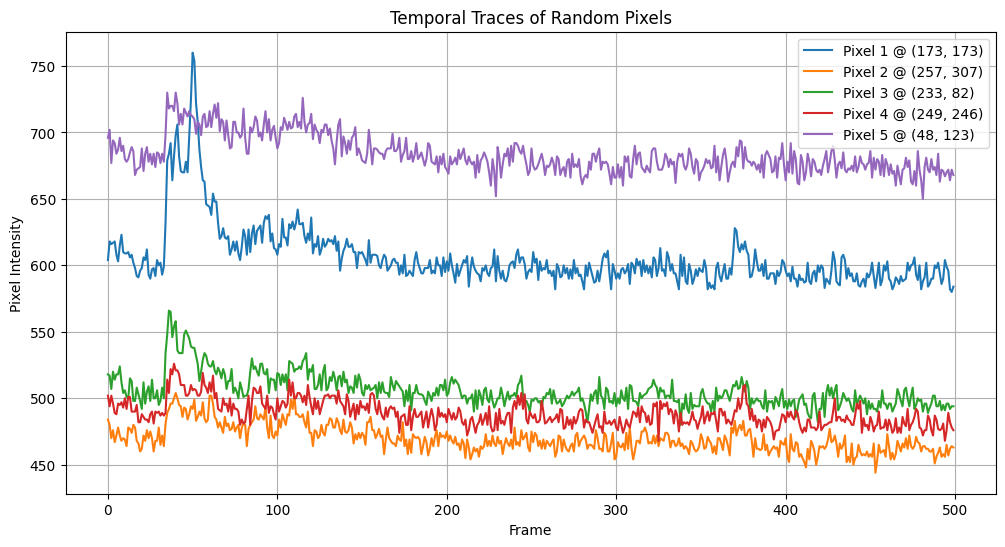

In [2]:
# Parameters
N = 5  # Number of random pixels

# Get dimensions
num_frames, height, width = video_data.shape

# Select N random (x, y) positions
random_pixels = [(random.randint(0, height-1), random.randint(0, width-1)) for _ in range(N)]

# Plot the temporal trace for each pixel
plt.figure(figsize=(12, 6))
for i, (y, x) in enumerate(random_pixels):
    pixel_trace = video_data[:, y, x]
    plt.plot(pixel_trace, label=f'Pixel {i+1} @ ({y}, {x})')
plt.title("Temporal Traces of Random Pixels")
plt.xlabel("Frame")
plt.ylabel("Pixel Intensity")
plt.legend()
plt.grid(True)
plt.show()

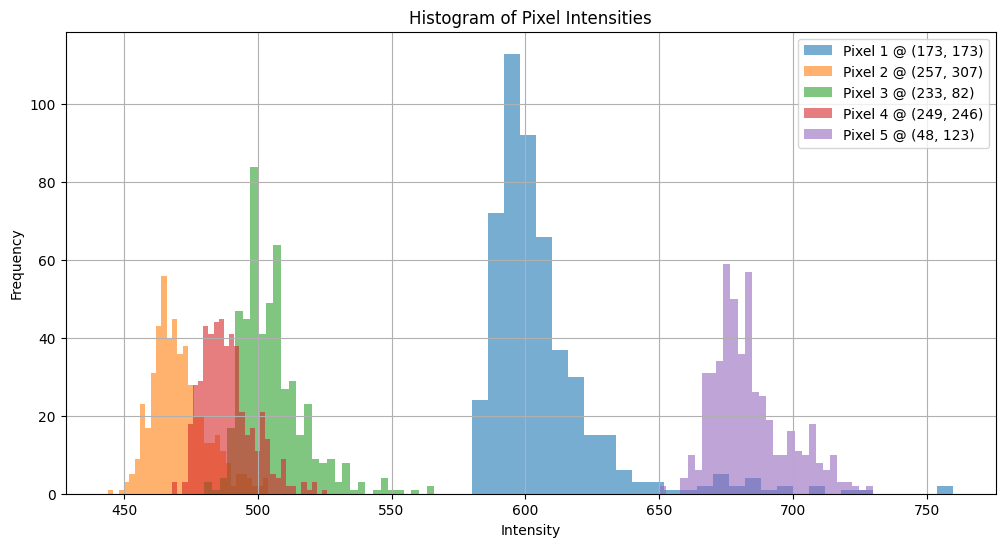

In [3]:
# Plot histograms
plt.figure(figsize=(12, 6))
for i, (y, x) in enumerate(random_pixels):
    pixel_trace = video_data[:, y, x]
    plt.hist(pixel_trace, bins=30, alpha=0.6, label=f'Pixel {i+1} @ ({y}, {x})')
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

Calcium indicators increase fluorescence when bound to calcium, which happens during neuronal activity. Thus, temporal traces of pixels in active neurons show fluctuations corresponding to calcium transients.

Why not analyze raw pixel traces directly?
  - **Noise**: Single-pixel traces are noisy and may contain signal from multiple sources.
  - **Spatial spread**: Neuronal signals typically span multiple pixels due to the size of the neuron and light scattering.
  - **Overlapping neurons**: Signal from overlapping neurons cannot be resolved without source extraction.
  - **Robustness**: Source extraction aggregates signals over spatial components, increasing SNR.

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

* How will this filtering affect the measure of crispness?

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video.

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


In [4]:
# 🔁 Clean up previous installs (voor de zekerheid, zonder verwijderen van /content zelf!)
!pip uninstall -y caiman numpy zarr numcodecs

# ✅ System dependencies
!apt-get update -qq
!apt-get install -y libtiff5-dev libfftw3-dev libblas-dev liblapack-dev \
    libhdf5-serial-dev libatlas-base-dev gfortran python3-dev cmake

# ✅ Clone CaImAn source
!git clone https://github.com/flatironinstitute/CaImAn.git /content/caiman

# ✅ Change directory in Python (niet met bash!)
import os
os.chdir('/content/caiman')

# ✅ Install specific versions
!pip install numpy==1.23.5 zarr==2.14.0 numcodecs==0.11.0 --force-reinstall

# ✅ Install requirements and CaImAn itself
!pip install -r requirements.txt
!pip install .

# ✅ Fix Python path so CaImAn is importeerbaar
import sys
sys.path.append('/content/caiman')

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libhdf5-dev' instead of 'libhdf5-serial-dev'
gfortran is already the newest version (4:11.2.0-1ubuntu1).
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libatlas-base-dev is already the newest version (3.10.3-12ubuntu1).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following additional packages will be installed:
  libfftw3-bin libfftw3-double3 libfftw3-long3 libfftw3-quad3 libfftw3

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Processing /content/caiman
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
^C


In [2]:
cd /content/caiman

/content/caiman


In [3]:
pip install .

Processing /content/caiman
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.8 MB/s eta 0:00:00
   

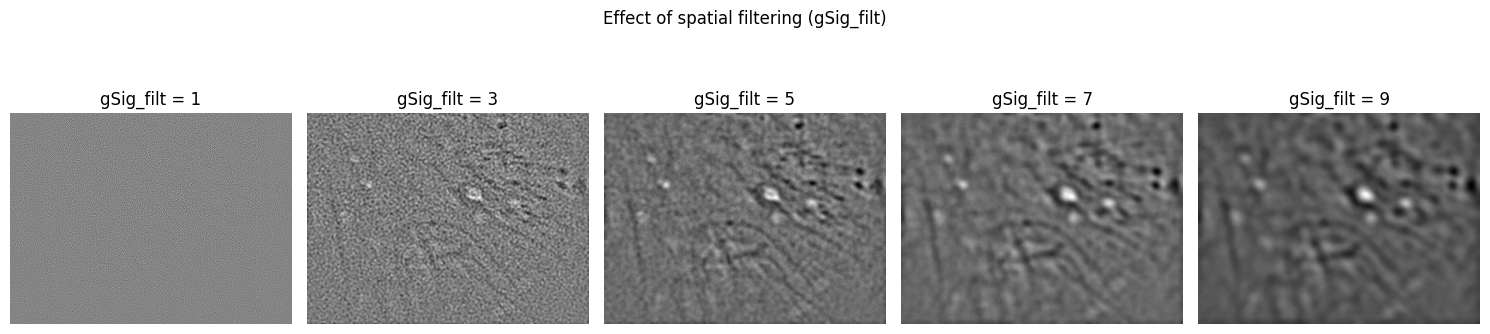

In [1]:
# Step 1
import numpy as np
import matplotlib.pyplot as plt
from caiman.motion_correction import high_pass_filter_space
import tifffile

# Load video path and one frame
video_path = '/content/caiman_video_trial_0.tif'
vid = tifffile.imread(video_path)
frame = vid[0]

# Test various spatial filter sizes
filter_sizes = [1, 3, 5, 7, 9]
fig, axes = plt.subplots(1, len(filter_sizes), figsize=(15, 4))

for i, filt in enumerate(filter_sizes):
    filtered = high_pass_filter_space(frame, (filt, filt))  # fix: tuple
    axes[i].imshow(filtered, cmap='gray')
    axes[i].set_title(f'gSig_filt = {filt}')
    axes[i].axis('off')

plt.suptitle("Effect of spatial filtering (gSig_filt)")
plt.tight_layout()
plt.show()

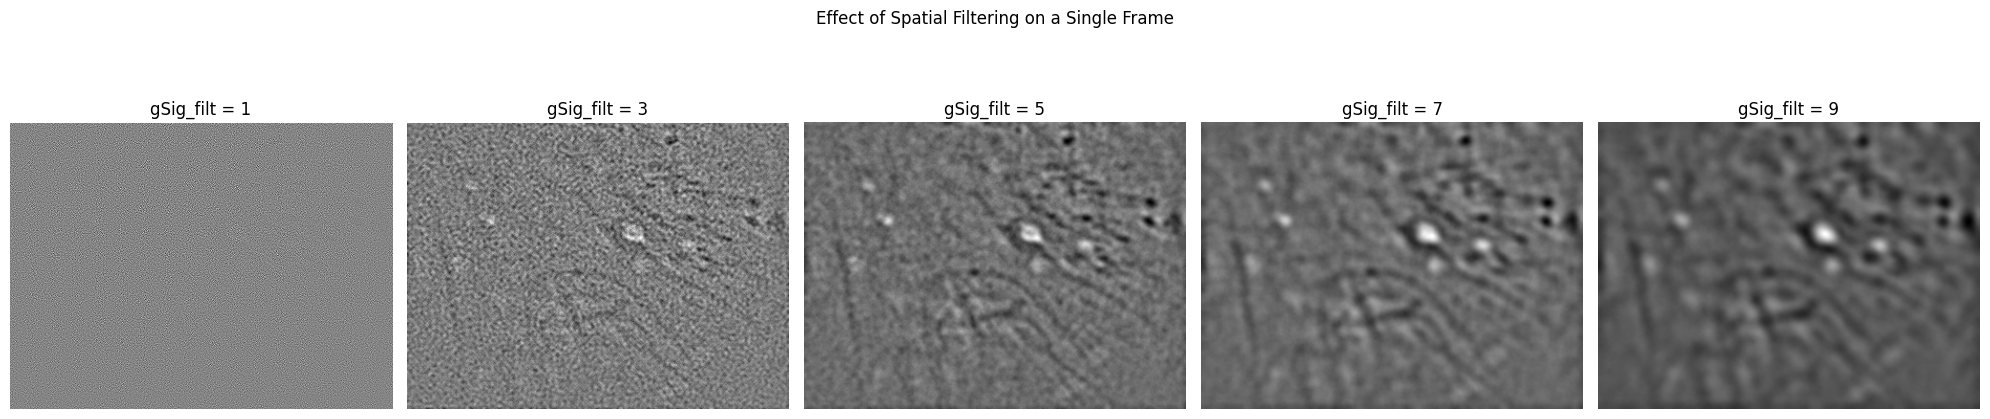

In [2]:
#STEP 2: Apply spatial filters to a single frame
from caiman.motion_correction import high_pass_filter_space
import matplotlib.pyplot as plt

frame = vid[0]  # First frame

gSig_filt_values = [1, 3, 5, 7, 9]

fig, axs = plt.subplots(1, len(gSig_filt_values), figsize=(20, 5))

for i, gSig in enumerate(gSig_filt_values):
    filtered_frame = high_pass_filter_space(frame, (gSig, gSig))
    axs[i].imshow(filtered_frame, cmap='gray')
    axs[i].set_title(f'gSig_filt = {gSig}')
    axs[i].axis('off')

plt.suptitle("Effect of Spatial Filtering on a Single Frame")
plt.tight_layout()
plt.show()

Spatial filtering (e.g. high-pass filters) enhances fine structures like neuron edges. This increases "crispness", which refers to the clarity and sharpness of spatial structures in the correlation image used for motion correction alignment.

In [3]:
def compute_crispness(img):
    gy, gx = np.gradient(img.astype(np.float32))
    return np.sqrt((gx**2 + gy**2).sum())  # Frobenius norm of image gradient

In [7]:
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf.preprocessing import compute_correlation_pnr

crispness_rigid = []
crispness_pwrigid = []
gsig_values = [3, 5, 7]

for gsig in gsig_values:
    print(f"Running motion correction with gSig_filt = {gsig}")

    # Rigid motion correction
    mc_rigid = MotionCorrect(
        video_path,
        dview=None,
        max_shifts=(6, 6),
        strides=(96, 96),
        overlaps=(32, 32),
        max_deviation_rigid=5,
        pw_rigid=False,
        gSig_filt=(gsig, gsig),
        border_nan='copy'
    )
    mc_rigid.motion_correct(save_movie=False)
    corr_rigid, _ = compute_correlation_pnr(mc_rigid.mmap_file, swap_dim=False)
    crispness_rigid.append(compute_crispness(corr_rigid))

    # Piecewise-rigid motion correction
    mc_pw = MotionCorrect(
        video_path,
        dview=None,
        max_shifts=(6, 6),
        strides=(96, 96),
        overlaps=(32, 32),
        max_deviation_rigid=5,
        pw_rigid=True,
        gSig_filt=(gsig, gsig),
        border_nan='copy'
    )
    mc_pw.motion_correct(save_movie=False)
    corr_pw, _ = compute_correlation_pnr(mc_pw.mmap_file, swap_dim=False)
    crispness_pwrigid.append(compute_crispness(corr_pw))


ModuleNotFoundError: No module named 'caiman.source_extraction.cnmf.preprocessing'

ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

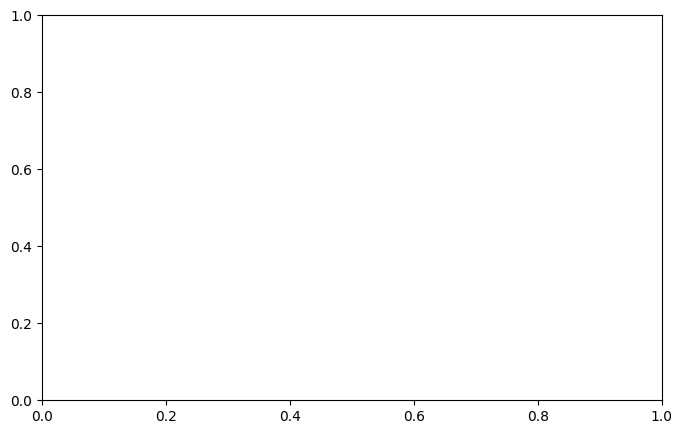

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(gsig_values, crispness_rigid, '-o', label='Rigid')
plt.plot(gsig_values, crispness_pwrigid, '-o', label='Piecewise-Rigid')
plt.xlabel('gSig_filt (Spatial Filter Size)')
plt.ylabel('Crispness (Gradient of Correlation Image)')
plt.title('Crispness vs. Spatial Filter Size')
plt.legend()
plt.grid(True)
plt.show()

### Discussion:

- **How does spatial filtering affect crispness?**
  Increasing the filter size smooths the image, reducing high-frequency noise. However, too much filtering may blur neuronal features, lowering crispness. The optimal value balances noise reduction and feature preservation.

- **What other parameters affect pw-rigid correction?**
  According to *Pnevmatikakis et al.*:
  - **Strides**: Affects sub-block size for pw-rigid shifts.
  - **Overlaps**: Ensures smooth transitions between blocks.
  - **Max_shifts**: Limits how much a block can move.
  - **Max_deviation_rigid**: Controls how much deviation from rigid shifts is allowed.

- **Why measure crispness?**
  It's a proxy for image sharpness and alignment quality. Higher crispness often means better motion correction.


## Exercise 3: Source extraction parameters
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.

In [14]:
from caiman.source_extraction.cnmf import params as params
from caiman.source_extraction.cnmf.cnmf import CNMF
from caiman.utils.visualization import plot_contours
import matplotlib.pyplot as plt

def run_source_extraction(fname, min_corr, min_pnr):
    cnm_params = params.CNMFParams(params_dict={
        'data': {'fnames': fname},
        'motion': {'pw_rigid': True},
        'preprocessing': {'min_corr': min_corr, 'min_pnr': min_pnr},
        'init': {'K': None, 'gSig': [5, 5]},
        'temporal': {'p': 1}  # 'method' no longer valid, use 'p'
    })

    cnm = CNMF(n_processes=1, params=cnm_params)
    cnm.fit_file(fname)
    return cnm


In [16]:
from caiman.motion_correction import MotionCorrect

# Rigid or piecewise-rigid motion correction (whichever you're using)
mc = MotionCorrect(
    video_path,
    dview=None,
    max_shifts=(6, 6),
    strides=(96, 96),
    overlaps=(32, 32),
    max_deviation_rigid=5,
    pw_rigid=True,  # or False
    gSig_filt=(5, 5),
    border_nan='copy'
)

mc.motion_correct(save_movie=True)
motion_corrected_path = mc.mmap_file  # ✅ use this in your analysis


In [19]:
pnr_values = [5, 6, 7, 8]
min_corr = 0.6
neuron_counts_pnr = []

for min_pnr in pnr_values:
    cnm = run_source_extraction(motion_corrected_path, min_corr, min_pnr)
    neuron_counts_pnr.append(len(cnm.estimates.C))  # count neurons

Exception: The file should be in C order (see save_memmap function)

In [ ]:
min_pnr = 6
corr_values = [0.3, 0.4, 0.5, 0.6, 0.7]
neuron_counts_corr = []

for min_corr in corr_values:
    cnm = run_source_extraction('motion_corrected_file.mmap', min_corr, min_pnr)
    neuron_counts_corr.append(len(cnm.estimates.C))


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(pnr_values, neuron_counts_pnr, marker='o')
plt.xlabel('Min PNR')
plt.ylabel('Number of neurons')
plt.title('Effect of Min PNR on source extraction')

plt.subplot(1, 2, 2)
plt.plot(corr_values, neuron_counts_corr, marker='o', color='orange')
plt.xlabel('Min Correlation')
plt.ylabel('Number of neurons')
plt.title('Effect of Min Correlation on source extraction')

plt.tight_layout()
plt.show()


In [ ]:
# Example with one result:
cnm = run_source_extraction('motion_corrected_file.mmap', 0.6, 6)

# Plot correlation image
cr_img = cnm.estimates.Cn
plt.imshow(cr_img, cmap='gray')
plt.title('Correlation Image')
plt.axis('off')
plt.show()

# Plot spatial components
plot_contours(cnm.estimates.A, cr_img, display_numbers=False)
plt.title('Extracted Neuron Spatial Footprints')


In [ ]:
traces = cnm.estimates.C  # (n_neurons, time)
plt.figure(figsize=(15, 5))
for i in range(min(5, traces.shape[0])):  # Plot a few
    plt.plot(traces[i] + i * 10)  # Offset for clarity
plt.title('Temporal Traces of Extracted Neurons')
plt.xlabel('Frame')
plt.ylabel('Fluorescence (a.u.)')
plt.show()


Q: How do these parameters affect spatial sparsity?
Higher min_corr / min_pnr = More stringent → fewer, cleaner neurons.

Lower thresholds = More inclusive → risk of false positives, noisier components.

Q: Which setting detects more neurons?
Typically, lower thresholds (e.g. min_corr=0.3, min_pnr=4) detect more neurons.

But more is not always better — can include noise or overlapping sources.

Q: Are temporal traces affected?
Yes. Noisier spatial components can produce less stable or less interpretable traces, especially if false positives are included.